In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = "train.csv"

data = pd.read_csv(url)

In [20]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
data.isnull().sum(axis = 0)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [22]:
data.shape

(103904, 25)

In [23]:
data.dropna(inplace=True)


In [24]:
data.shape

(103594, 25)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

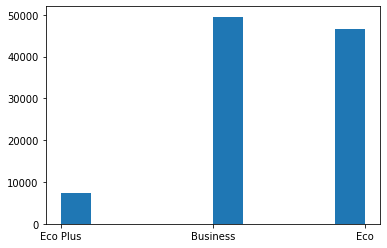

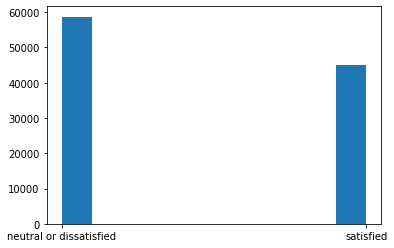

In [26]:
plt.hist(data["Class"])
plt.show()

plt.hist(data["satisfaction"])
plt.show()

In [27]:
le = LabelEncoder()
data['satisfaction_code'] = le.fit_transform(data['satisfaction'])

In [28]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [29]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [30]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_code
0,56002,1,0,6,1,2,358,3,4,3,...,4,3,3,4,5,5,25,18,0,0
1,3966,1,1,18,0,0,144,3,2,3,...,1,5,2,1,4,1,1,6,0,0
2,87774,0,0,19,0,0,994,2,2,2,...,4,3,3,4,4,5,0,0,1,1
3,19073,0,0,18,0,0,446,2,5,5,...,2,5,2,1,4,2,11,9,0,0
4,95156,1,0,54,0,0,124,3,3,3,...,3,4,3,3,3,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,75192,0,1,16,0,1,102,2,1,2,...,3,1,3,2,3,2,3,0,0,0
103900,58358,1,0,42,0,0,2143,4,4,4,...,5,5,4,5,5,4,0,0,1,1
103901,54953,1,1,23,0,0,1791,1,1,1,...,3,2,3,5,5,4,7,14,0,0
103902,43192,0,1,15,0,1,860,1,1,1,...,4,5,0,5,4,1,0,0,0,0


In [31]:
for i in data.columns:
    print(i, data[i].unique())

id [56002  3966 87774 ... 54953 43192 49934]
Gender [1 0]
Customer Type [0 1]
Age [ 6 18 19 54 40 45 34 13 17  5 46 26 38 31  2 10 36 51 16 50 42 29 15 24
  8 28 60 30 33 27 32 43 22 47 14 21 20 62 53 41 52 39 23 59 57 37 44 25
 12 35  9  4 55  1 49 61 48 11 58 65 63 56  3  0  7 73 67 64 74 66 69 70
 68 72 71]
Type of Travel [1 0]
Class [2 0 1]
Flight Distance [ 358  144  994 ...  834 1278  300]
Inflight wifi service [3 2 4 1 5 0]
Departure/Arrival time convenient [4 2 5 3 1 0]
Ease of Online booking [3 2 5 4 1 0]
Gate location [1 3 2 5 4 0]
Food and drink [5 1 2 4 3 0]
Online boarding [3 5 2 1 4 0]
Seat comfort [5 1 2 3 4 0]
Inflight entertainment [5 1 2 3 4 0]
On-board service [4 1 2 3 5 0]
Leg room service [3 5 4 2 1 0]
Baggage handling [3 2 4 0 1]
Checkin service [4 1 3 5 2 0]
Inflight service [5 4 3 1 2 0]
Cleanliness [5 1 2 3 4 0]
Departure Delay in Minutes [ 25   1   0  11   9   4  28  43  49   7  17  52  54  27  18  19   3 109
  23   8  14  10  51  39  13  30  64  20  45  44  3

In [33]:
#data.drop("Class_code", axis = 1, inplace = True)
data.drop("satisfaction_code", axis = 1, inplace = True)

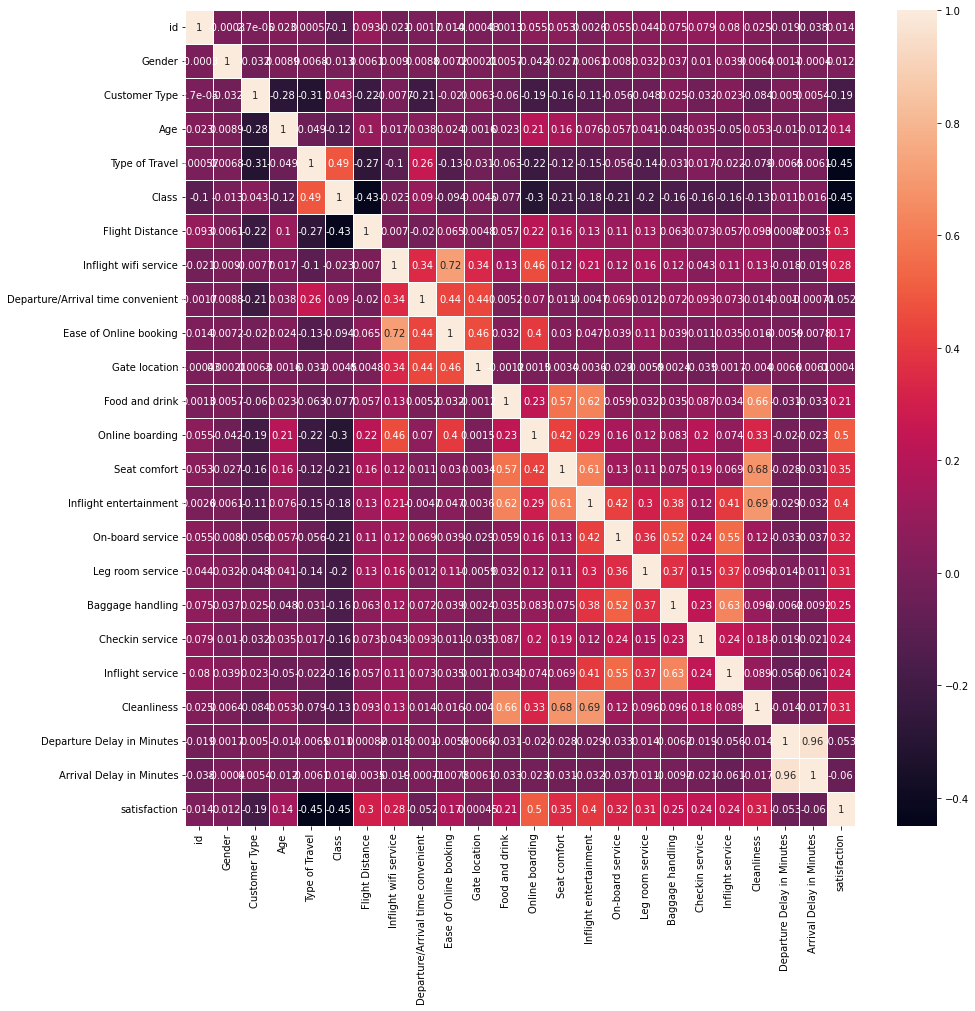

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [39]:
correlation_chart = data.corr()
top_10 = correlation_chart.nlargest(10,"satisfaction")
top_10

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
satisfaction,0.013691,0.012356,-0.187558,0.137080,-0.448995,-0.449466,0.298903,0.284163,-0.051718,0.171507,...,0.398203,0.322450,0.313182,0.247819,0.235914,0.244852,0.305050,-0.052867,-0.060050,1.000000
Online boarding,0.055425,-0.042151,-0.189477,0.208712,-0.224620,-0.296949,0.215113,0.457002,0.069990,0.404093,...,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.019782,-0.023338,0.503447
Inflight entertainment,0.002595,0.006071,-0.110106,0.076401,-0.147978,-0.178928,0.128883,0.209513,-0.004683,0.047185,...,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,-0.028949,-0.031995,0.398203
Seat comfort,0.053124,-0.026643,-0.159722,0.160323,-0.123994,-0.209955,0.157427,0.122617,0.011416,0.030021,...,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.028317,-0.030991,0.349112
On-board service,0.055296,0.008019,-0.056374,0.057157,-0.056468,-0.207922,0.109508,0.121484,0.068604,0.038759,...,0.420352,1.000000,0.355657,0.519252,0.243852,0.550725,0.123236,-0.033084,-0.036858,0.322450
Leg room service,0.044489,0.031842,-0.047809,0.040505,-0.138680,-0.197331,0.133603,0.160485,0.012461,0.107431,...,0.299850,0.355657,1.000000,0.369674,0.153079,0.368925,0.096401,0.013978,0.011441,0.313182
Cleanliness,0.025333,0.006439,-0.083757,0.053496,-0.078767,-0.125933,0.093046,0.132652,0.014337,0.016192,...,0.691735,0.123236,0.096401,0.095783,0.179431,0.088891,1.000000,-0.014495,-0.016527,0.305050
Flight Distance,0.093056,0.006067,-0.224990,0.100450,-0.268177,-0.427191,1.000000,0.006981,-0.020393,0.065340,...,0.128883,0.109508,0.133603,0.063078,0.072871,0.057250,0.093046,0.000820,-0.003497,0.298903
Inflight wifi service,-0.021352,0.008964,-0.007706,0.017477,-0.104879,-0.023046,0.006981,1.000000,0.343758,0.715848,...,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017582,-0.019312,0.284163
Baggage handling,0.075180,0.037333,0.024890,-0.047611,-0.031355,-0.164016,0.063078,0.121060,0.071901,0.038851,...,0.378361,0.519252,0.369674,1.000000,0.233326,0.628944,0.095783,-0.006239,-0.009189,0.247819


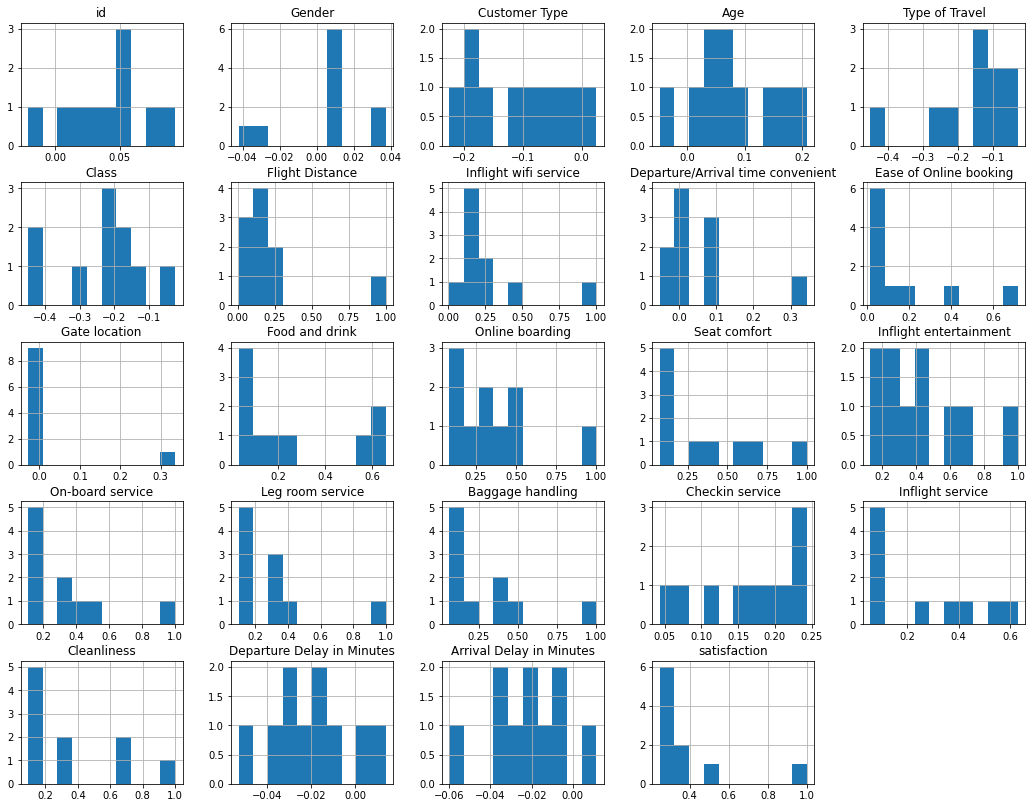

In [40]:
top_10.hist(figsize=(18,14))
plt.show()

In [41]:
target= data["satisfaction"].values
feature= data.drop(["satisfaction"],axis=1)

In [42]:
print(target)
print(feature)

[0 0 1 ... 0 0 0]
           id  Gender  Customer Type  Age  Type of Travel  Class  \
0       56002       1              0    6               1      2   
1        3966       1              1   18               0      0   
2       87774       0              0   19               0      0   
3       19073       0              0   18               0      0   
4       95156       1              0   54               0      0   
...       ...     ...            ...  ...             ...    ...   
103899  75192       0              1   16               0      1   
103900  58358       1              0   42               0      0   
103901  54953       1              1   23               0      0   
103902  43192       0              1   15               0      1   
103903  49934       1              0   20               0      0   

        Flight Distance  Inflight wifi service  \
0                   358                      3   
1                   144                      3   
2              

In [43]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(feature)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=11)

In [45]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(82875, 23) (20719, 23) (82875,) (20719,)


In [63]:
SVCModel=SVC(C=0.5, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=101, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr', random_state=0)
SVCModel.fit(x_train, y_train)

SVC(C=0.5, cache_size=101, gamma='auto', probability=True, random_state=0)

In [64]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))
#Calculating Prediction
y_pred = SVCModel.predict(x_test)
print('Predicted Value for SVCModel is : ' , y_pred[:20])
print("target values y_test........ is : " , y_test[:20])

SVCModel Train Score is :  0.9554268476621418
SVCModel Test Score is :  0.954631015010377
Predicted Value for SVCModel is :  [0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0]
target values y_test........ is :  [0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0]


Confusion Matrix is : 
 [[11463   342]
 [  598  8316]]


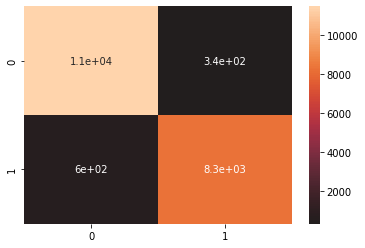

In [65]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True , annot = True)
plt.show()

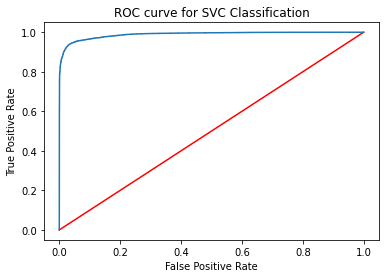

In [68]:
from sklearn.metrics import roc_curve
from sklearn import metrics

SV_y_pred = SVCModel.predict_proba(x_test)[:,1]
false, true, thresholds = roc_curve(y_test, SV_y_pred)
auc = metrics.roc_auc_score(y_test, SV_y_pred)
plt.plot([0,1],[0,1],'r-')
plt.plot(false,true, label='SVC Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVC Classification')
plt.show()

In [50]:
DecisionTreeClassifierModel=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5,min_samples_split=5,
                                    min_samples_leaf=3,max_features=None,
                                    random_state=0, max_leaf_nodes=3)
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, min_samples_leaf=3,
                       min_samples_split=5, random_state=0)

In [51]:
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.8436199095022624
DecisionTreeClassifierModel Test Score is :  0.842801293498721
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.         0.         0.27714054 0.
 0.         0.         0.         0.         0.         0.
 0.72285946 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [52]:
DT_y_pred = DecisionTreeClassifierModel.predict(x_test)
DT_y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , DT_y_pred[:10])
print("real values of y_test                           is : " , y_test[:10] )
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , DT_y_pred_prob[:10])

Predicted Value for DecisionTreeClassifierModel is :  [0 1 0 0 0 0 0 0 0 1]
real values of y_test                           is :  [0 1 0 1 0 0 0 0 0 1]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.85040631 0.14959369]
 [0.14806322 0.85193678]
 [0.85040631 0.14959369]
 [0.85040631 0.14959369]
 [0.77684362 0.22315638]
 [0.85040631 0.14959369]
 [0.85040631 0.14959369]
 [0.85040631 0.14959369]
 [0.85040631 0.14959369]
 [0.14806322 0.85193678]]


Confusion Matrix is : 
 [[10552  1253]
 [ 2004  6910]]


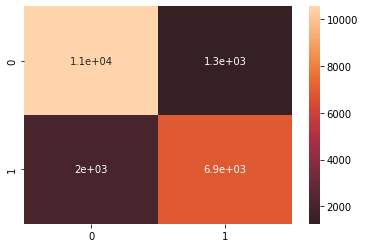

In [53]:
#Calculating Confusion Matrix
DT_CM = confusion_matrix(y_test, DT_y_pred)
print('Confusion Matrix is : \n', DT_CM)

# drawing confusion matrix
sns.heatmap(DT_CM, center = True , annot = True)
plt.show()



#Result not so good

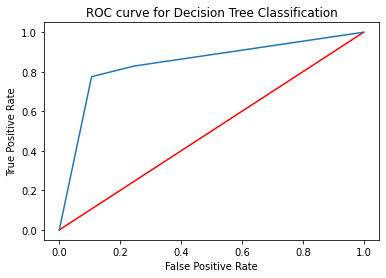

In [54]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred = DecisionTreeClassifierModel.predict_proba(x_test)[:,1]
false, true, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot([0,1],[0,1],'r-')
plt.plot(false,true, label='Decision Tree Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classification')
plt.show()

In [55]:
RandomForestClassifierModel=RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=7,
                                min_samples_split=3, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                max_features='auto',max_leaf_nodes=7,min_impurity_decrease=0.0,
                                bootstrap=True,oob_score=False, n_jobs=1,
                                random_state=0)
RandomForestClassifierModel.fit(x_train, y_train)

/Users/gokul_08/Coventry_DS/Softwares/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=7, max_features='auto', max_leaf_nodes=7,
                       min_samples_split=3, n_estimators=30, n_jobs=1,
                       random_state=0)

In [56]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.8776229260935143
RandomForestClassifierModel Test Score is :  0.8759109995656161
RandomForestClassifierModel features importances are :  [0.00103808 0.         0.02219246 0.00861045 0.08554729 0.22096621
 0.02259572 0.05819951 0.0035416  0.02007228 0.00612037 0.00511128
 0.26828061 0.07524495 0.09220612 0.03280151 0.04235585 0.01310698
 0.00144656 0.00440613 0.01615605 0.         0.        ]


In [57]:
#Calculating Prediction
RC_y_pred = RandomForestClassifierModel.predict(x_test)
RC_y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , RC_y_pred[:10])
print("real values of target colunm y_test             is : " , y_test[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , RC_y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
real values of target colunm y_test             is :  [0 1 0 1 0 0 0 0 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.88393994 0.11606006]
 [0.68262708 0.31737292]
 [0.74969589 0.25030411]
 [0.70540704 0.29459296]
 [0.77512567 0.22487433]
 [0.87109842 0.12890158]
 [0.78852756 0.21147244]
 [0.79439594 0.20560406]
 [0.84549207 0.15450793]
 [0.5340801  0.4659199 ]]


Confusion Matrix is : 
 [[10986   819]
 [ 1752  7162]]


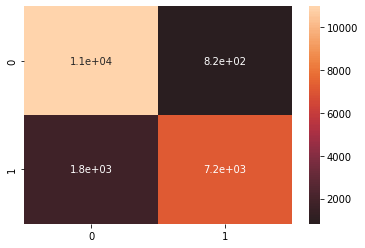

In [58]:
#Calculating Confusion Matrix
RC_CM = confusion_matrix(y_test, RC_y_pred)
print('Confusion Matrix is : \n', RC_CM)

# drawing confusion matrix
sns.heatmap(RC_CM, center = True ,annot = True)
plt.show()
 

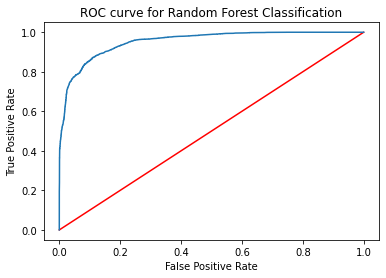

In [69]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_RF = RandomForestClassifierModel.predict_proba(x_test)[:,1]
false, true, thresholds = roc_curve(y_test, y_pred_RF)
auc = metrics.roc_auc_score(y_test, y_pred_RF)
plt.plot([0,1],[0,1],'r-')
plt.plot(false,true, label='Random Forest Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classification')
plt.show()